# Employee retention HR analytics

Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance. While turnover rates vary from industry to industry, the Bureau of Labor Statistics reported that among voluntary separations the overall turnover rate was 25% in 2020.

In this notebook, I will explore IBM's dataset on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data

In [1]:
import pandas as pd
hr_df = pd.read_csv('ibm_hr_data.csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
hr_df.shape

(1470, 35)

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
cat_col = list(hr_df.select_dtypes(exclude=['int64', 'float']).columns)

In [5]:
hr_df[cat_col].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [6]:
for col in cat_col:
    print(col, hr_df[col].unique())
    print()


Attrition ['Yes' 'No']

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department ['Sales' 'Research & Development' 'Human Resources']

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender ['Female' 'Male']

JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus ['Single' 'Married' 'Divorced']

Over18 ['Y']

OverTime ['Yes' 'No']



In [7]:
hr_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
hr_df.iloc[:10,:15].head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1


In [9]:
hr_df.iloc[:10,15:].head(5)

,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
print(hr_df['EmployeeCount'].unique())

[1]


In [11]:
print(hr_df['StandardHours'].unique())

[80]


In [12]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
# Removing Over18 ,EmployeeCount,StandardHours as they dont hold any vaue addition
main_df = hr_df.drop(columns=['Over18','EmployeeCount','StandardHours'])
main_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [23]:
Attrition_map = {'Yes': 1,'No':0}

In [24]:
main_df['Attrition'] = main_df['Attrition'].map(Attrition_map)

In [25]:
main_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
main_df.groupby('Department').sum()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,2382,12,47347,548,187,75932,169,4051,173,128,...,198,182,49,728,161,184,456,223,112,231
Research & Development,35598,133,775384,8788,2786,967250,2637,63587,2635,1900,...,3039,2603,773,10900,2684,2619,6597,3993,2054,3925
Sales,16298,92,356923,4177,1309,463370,1195,29222,1205,1006,...,1399,1202,345,4953,1270,1256,3249,2001,1050,1905


### Displaying your correlation matrix

No handles with labels found to put in legend.


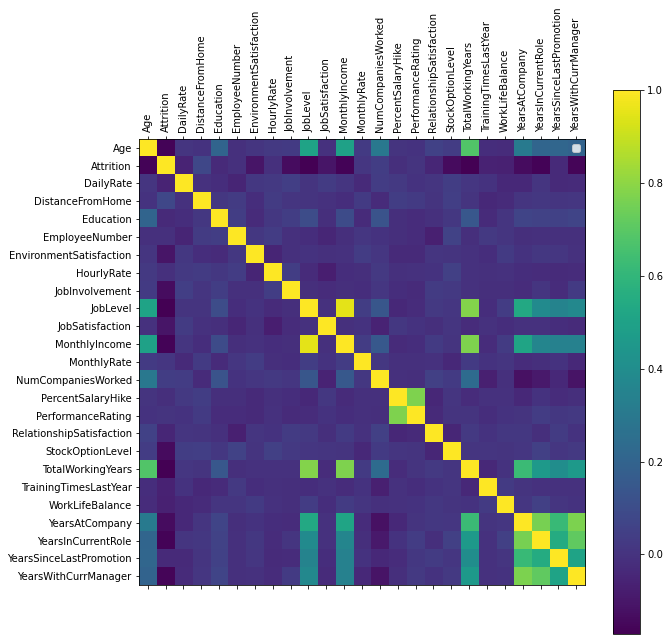

In [27]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df)

In [28]:
# Perform One Hot Encoding on Categorical Data

categorial = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
main_df_final = pd.get_dummies(main_df, columns=categorial, drop_first=True)
main_df_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [29]:
len(main_df_final.columns)

46

In [30]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [31]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['Attrition'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['Attrition'].values

In [32]:
# Split it to a 75:25 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix.
# This is equivalent to fit followed by the transform, but more efficiently implemented.

In [34]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.769907,-0.414964,0.955029,1.056352,0.492627,-0.662912,1.426075,0.371951,0.849995,-1.575167,...,-0.465119,3.700450,-0.326230,-0.250361,-0.505099,-0.529062,-0.250361,1.115526,-0.699421,1.573639
1,-0.769907,1.386762,1.815569,-1.849055,-1.680086,1.193578,0.059141,0.371951,-0.958296,0.251066,...,2.149988,-0.270237,-0.326230,-0.250361,-0.505099,-0.529062,-0.250361,-0.896438,-0.699421,-0.635470
2,-0.659058,-1.373064,-0.397250,1.056352,-1.427985,-0.662912,0.498513,-2.425930,-0.054150,0.251066,...,-0.465119,-0.270237,-0.326230,-0.250361,-0.505099,1.890136,-0.250361,1.115526,-0.699421,1.573639
3,-0.659058,1.309616,-0.766053,1.056352,-1.139396,-0.662912,0.352056,0.371951,0.849995,0.251066,...,-0.465119,-0.270237,-0.326230,3.994227,-0.505099,-0.529062,-0.250361,-0.896438,-0.699421,-0.635470
4,-0.104814,-0.601606,0.340357,1.056352,0.978585,0.265333,0.498513,0.371951,-0.054150,0.251066,...,-0.465119,-0.270237,3.065326,-0.250361,-0.505099,-0.529062,-0.250361,1.115526,-0.699421,1.573639


In [35]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,...,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03
mean,2.319177e-16,1.331361e-16,-1.318264e-16,-2.567769e-16,-6.165667e-17,-3.772945e-17,-2.079401e-16,3.220856e-16,-4.513429e-17,1.528320e-16,...,-6.589808e-16,-2.080409e-16,3.546266e-17,3.896863e-16,2.417909e-18,2.885371e-16,-2.039103e-16,3.385072e-17,1.559551e-16,1.545447e-16
std,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,...,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00,1.000454e+00
min,-2.100094e+00,-1.738884e+00,-1.011922e+00,-1.849055e+00,-1.696672e+00,-1.591156e+00,-1.747165e+00,-2.425930e+00,-9.582956e-01,-1.575167e+00,...,-4.651188e-01,-2.702374e-01,-3.262295e-01,-2.503614e-01,-5.050993e-01,-5.290625e-01,-2.503614e-01,-8.964378e-01,-6.994206e-01,-6.354696e-01
25%,-7.699072e-01,-8.324214e-01,-8.889875e-01,-8.805859e-01,-8.972461e-01,-6.629116e-01,-8.684213e-01,-1.026990e+00,-9.582956e-01,-6.620509e-01,...,-4.651188e-01,-2.702374e-01,-3.262295e-01,-2.503614e-01,-5.050993e-01,-5.290625e-01,-2.503614e-01,-8.964378e-01,-6.994206e-01,-6.354696e-01
50%,-1.048136e-01,5.604931e-03,-2.743155e-01,8.788283e-02,-1.820954e-02,2.653331e-01,1.032200e-02,3.719505e-01,-5.415027e-02,2.510656e-01,...,-4.651188e-01,-2.702374e-01,-3.262295e-01,-2.503614e-01,-5.050993e-01,-5.290625e-01,-2.503614e-01,-8.964378e-01,-6.994206e-01,-6.354696e-01
75%,6.711290e-01,8.766049e-01,5.862253e-01,1.056352e+00,9.006324e-01,1.193578e+00,8.890653e-01,3.719505e-01,8.499951e-01,1.164182e+00,...,-4.651188e-01,-2.702374e-01,-3.262295e-01,-2.503614e-01,-5.050993e-01,-5.290625e-01,-2.503614e-01,1.115526e+00,1.429755e+00,1.573639e+00
max,2.555561e+00,1.737651e+00,2.430241e+00,2.024820e+00,1.731571e+00,1.193578e+00,1.670170e+00,1.770891e+00,2.658286e+00,1.164182e+00,...,2.149988e+00,3.700450e+00,3.065326e+00,3.994227e+00,1.979809e+00,1.890136e+00,3.994227e+00,1.115526e+00,1.429755e+00,1.573639e+00


## Let's Train a Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 88.32%
[[300  10]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       310
           1       0.71      0.43      0.54        58

    accuracy                           0.88       368
   macro avg       0.81      0.70      0.74       368
weighted avg       0.87      0.88      0.87       368



### Let's Try a Random Forest Classifer

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 86.68%
[[309   1]
 [ 48  10]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       310
           1       0.91      0.17      0.29        58

    accuracy                           0.87       368
   macro avg       0.89      0.58      0.61       368
weighted avg       0.87      0.87      0.83       368



In [42]:
main_df_final.drop(['Attrition'],axis=1).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRol

In [43]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
10,0.072024
44,0.066581
0,0.055853
1,0.052583
11,0.050307
2,0.046774
17,0.046600
4,0.045731
6,0.040527
20,0.038226
